In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import os

cbb = pd.read_csv("March_Madness.csv", encoding='utf-8')
print(cbb.shape[1])
cbb.head(10)

28


,Unnamed: 0,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,EFG%,EFGD%,...,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,WINS,LOSSES
0,0,2008,Kansas,B12,33.0,30–3,121.0,85.6,56.3,44.8,...,39.9,34.0,29.2,38.1,69.5,9.9,1.0,CHAMPS,30.0,3.0
1,2,2008,North Carolina,ACC,34.0,32–2,120.2,91.8,52.4,48.0,...,37.8,33.2,22.2,34.8,75.1,11.9,1.0,Final Four,32.0,2.0
2,4,2008,Texas,B12,33.0,27–6,120.0,94.2,51.4,46.1,...,37.7,33.2,34.3,38.9,64.8,8.4,2.0,Elite Eight,27.0,6.0
3,6,2008,Drake,MVC,30.0,26–4,118.0,96.3,52.8,49.8,...,36.6,33.8,45.5,39.3,64.2,5.2,5.0,R64,26.0,4.0
4,8,2008,Oregon,P10,31.0,18–13,117.8,101.2,56.3,50.2,...,40.1,33.6,39.0,35.3,67.9,0.8,9.0,R64,18.0,13.0
5,10,2008,Duke,ACC,32.0,27–5,117.2,88.8,54.1,47.6,...,38.4,32.8,39.1,24.8,73.7,8.9,2.0,R32,27.0,5.0
6,12,2008,UCLA,P10,33.0,30–3,116.4,86.9,52.3,48.0,...,33.8,34.2,28.1,27.9,66.2,10.8,1.0,Final Four,30.0,3.0
7,14,2008,Tennessee,SEC,32.0,28–4,116.3,92.2,52.8,49.2,...,36.4,31.0,39.1,35.6,72.7,9.2,2.0,Sweet Sixteen,28.0,4.0
8,16,2008,Pittsburgh,BE,34.0,25–9,116.1,95.7,51.1,48.0,...,34.3,32.8,30.3,34.7,65.2,5.3,4.0,R32,25.0,9.0
9,20,2008,Notre Dame,BE,31.0,24–7,115.6,95.3,52.8,46.9,...,41.0,34.1,33.5,33.3,70.8,4.4,5.0,R32,24.0,7.0


/var/folders/k6/p6dgbd450q9fk0lq853zrv8h0000gn/T/ipykernel_18915/1900279595.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cbb.corr()


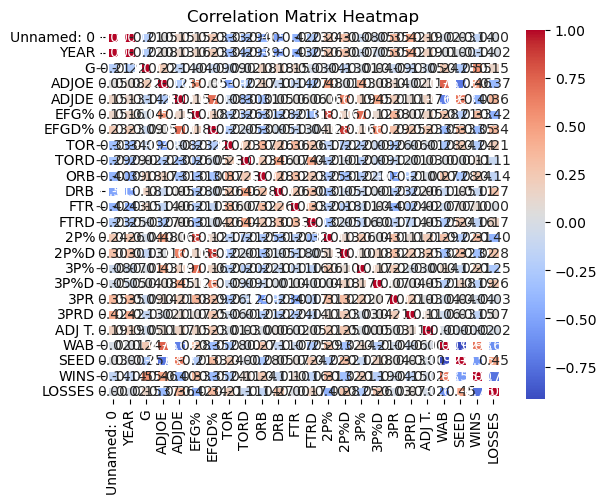

Correlation Matrix:
            Unnamed: 0      YEAR         G     ADJOE     ADJDE      EFG%  \
Unnamed: 0    1.000000  0.997324 -0.207341  0.047784  0.153154  0.146327   
YEAR          0.997324  1.000000 -0.222113  0.079392  0.132132  0.161460   
G            -0.207341 -0.222113  1.000000  0.223066 -0.140876 -0.038122   
ADJOE         0.047784  0.079392  0.223066  1.000000 -0.231019  0.571346   
ADJDE         0.153154  0.132132 -0.140876 -0.231019  1.000000  0.151151   
EFG%          0.146327  0.161460 -0.038122  0.571346  0.151151  1.000000   
EFGD%         0.229336  0.225785 -0.089236  0.049609  0.701090  0.184095   
TOR          -0.330388 -0.338900 -0.087301 -0.492684 -0.078568 -0.232539   
TORD         -0.291107 -0.291273  0.021310 -0.223948 -0.303576 -0.261090   
ORB          -0.402695 -0.391277  0.179391  0.169941 -0.305451 -0.309746   
DRB          -0.506489 -0.507888  0.178136 -0.096997  0.052005 -0.276279   
FTR          -0.415463 -0.430051  0.150211 -0.137204  0.059951 -0.21

In [4]:
correlation_matrix = cbb.corr()

# Display the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

In [22]:
def rank_correlations(dataframe):
    """
    Rank relationships by their highest correlations (excluding correlations equal to 1).

    Parameters:
    - dataframe: pandas DataFrame

    Returns:
    - ranked_correlations: DataFrame with ranked correlations
    """
    # Compute the correlation matrix
    correlation_matrix = dataframe.corr()

    # Print the correlation matrix for debugging
    print("Correlation Matrix:")
    print(correlation_matrix)

    # Initialize lists to store results
    columns = []
    highest_correlations = []
    correlation_values = []

    # Iterate over columns
    for col in correlation_matrix.columns:
        # Exclude correlations equal to 1 and find the maximum correlation
        max_corr = correlation_matrix[col][correlation_matrix[col] < 1].max()

        # If there is a valid maximum correlation, add the information to lists
        if not pd.isnull(max_corr):
            columns.append(col)
            highest_correlations.append(correlation_matrix[col].idxmax())
            correlation_values.append(max_corr)

    # Create a DataFrame to store the ranked correlations
    ranked_correlations = pd.DataFrame({
        'Column': columns,
        'Highest_Correlation': highest_correlations,
        'Correlation_Value': correlation_values
    })

    # Sort the DataFrame by absolute correlation values
    ranked_correlations['Absolute_Correlation'] = abs(ranked_correlations['Correlation_Value'])
    ranked_correlations = ranked_correlations.sort_values(by='Absolute_Correlation', ascending=False)

    return ranked_correlations

# Example usage
cbb = pd.read_csv("March_Madness.csv", encoding='utf-8')
result = rank_correlations(cbb)
print(result)

Correlation Matrix:
            Unnamed: 0      YEAR         G     ADJOE     ADJDE      EFG%  \
Unnamed: 0    1.000000  0.997324 -0.207341  0.047784  0.153154  0.146327   
YEAR          0.997324  1.000000 -0.222113  0.079392  0.132132  0.161460   
G            -0.207341 -0.222113  1.000000  0.223066 -0.140876 -0.038122   
ADJOE         0.047784  0.079392  0.223066  1.000000 -0.231019  0.571346   
ADJDE         0.153154  0.132132 -0.140876 -0.231019  1.000000  0.151151   
EFG%          0.146327  0.161460 -0.038122  0.571346  0.151151  1.000000   
EFGD%         0.229336  0.225785 -0.089236  0.049609  0.701090  0.184095   
TOR          -0.330388 -0.338900 -0.087301 -0.492684 -0.078568 -0.232539   
TORD         -0.291107 -0.291273  0.021310 -0.223948 -0.303576 -0.261090   
ORB          -0.402695 -0.391277  0.179391  0.169941 -0.305451 -0.309746   
DRB          -0.506489 -0.507888  0.178136 -0.096997  0.052005 -0.276279   
FTR          -0.415463 -0.430051  0.150211 -0.137204  0.059951 -0.21

/var/folders/k6/p6dgbd450q9fk0lq853zrv8h0000gn/T/ipykernel_62338/699554308.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataframe.corr()


In [ ]:
## Biggest correlations with wins: WAB, ADJOE, EFG%, 2P%, EFG%D, 2P%D, 
## 2P% and 2P%D correlate more strongly with wins. I wonder if this changes when seeds change

In [24]:
data = pd.read_csv('March_Madness.csv')

data['Is_32'] = data['FINISH'].apply(lambda x: 1 if x != 'R64' else 0)
data

,Unnamed: 0,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,EFG%,EFGD%,...,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,WINS,LOSSES,Is_32
0,0,2008,Kansas,B12,33.0,30–3,121.0,85.6,56.3,44.8,...,34.0,29.2,38.1,69.5,9.9,1.0,CHAMPS,30.0,3.0,1
1,2,2008,North Carolina,ACC,34.0,32–2,120.2,91.8,52.4,48.0,...,33.2,22.2,34.8,75.1,11.9,1.0,Final Four,32.0,2.0,1
2,4,2008,Texas,B12,33.0,27–6,120.0,94.2,51.4,46.1,...,33.2,34.3,38.9,64.8,8.4,2.0,Elite Eight,27.0,6.0,1
3,6,2008,Drake,MVC,30.0,26–4,118.0,96.3,52.8,49.8,...,33.8,45.5,39.3,64.2,5.2,5.0,R64,26.0,4.0,0
4,8,2008,Oregon,P10,31.0,18–13,117.8,101.2,56.3,50.2,...,33.6,39.0,35.3,67.9,0.8,9.0,R64,18.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,10272,2023,VCU,A10,34.0,27–7,104.2,93.1,52.2,47.0,...,32.3,32.8,34.1,68.8,1.0,12.0,R64,27.0,7.0,0
956,10276,2023,Montana St.,BSky,32.0,23–9,104.1,97.0,50.9,49.4,...,34.8,33.3,34.2,67.1,-2.7,14.0,R64,23.0,9.0,0
957,10400,2023,UNC Asheville,BSth,32.0,25–7,101.2,102.4,53.9,48.0,...,30.5,37.2,34.0,69.1,-1.9,15.0,R64,25.0,7.0,0
958,10412,2023,Northern Kentucky,Horz,32.0,20–12,101.1,101.1,49.8,51.3,...,36.7,40.7,38.9,62.6,-6.7,16.0,R64,20.0,12.0,0


In [26]:
numerical_columns = ['YEAR', 'G', 'ADJOE', 'ADJDE', 'EFG%', 'EFGD%', '3P%D', '3PR', '3PRD', 'ADJ T.', 'WAB', 'SEED', 'FINISH', 'WINS', 'LOSSES', 'Is_32']


numerical_df = data[numerical_columns]

correlation_matrix = numerical_df.corr(method='pearson')

is_32_correlation = correlation_matrix['Is_32'].sort_values(ascending=False)

print(correlation_matrix)

print("\nCorrelation of 'Is_32' with other variables:\n", is_32_correlation)

                YEAR         G     ADJOE     ADJDE      EFG%     EFGD%  \
YEAR    1.000000e+00 -0.222113  0.079392  0.132132  0.161460  0.225785   
G      -2.221129e-01  1.000000  0.223066 -0.140876 -0.038122 -0.089236   
ADJOE   7.939181e-02  0.223066  1.000000 -0.231019  0.571346  0.049609   
ADJDE   1.321320e-01 -0.140876 -0.231019  1.000000  0.151151  0.701090   
EFG%    1.614600e-01 -0.038122  0.571346  0.151151  1.000000  0.184095   
EFGD%   2.257847e-01 -0.089236  0.049609  0.701090  0.184095  1.000000   
3P%D   -5.086745e-02  0.035736  0.082387  0.452393  0.118180  0.609619   
3PR     3.533796e-01 -0.091578  0.137097  0.209174  0.376289  0.293451   
3PRD    4.216166e-01 -0.131457 -0.016597  0.105703  0.071376  0.251207   
ADJ T.  1.859563e-01 -0.050151  0.108338  0.167017  0.153406  0.230328   
WAB     1.442350e-02  0.239942  0.754043 -0.691301  0.280284 -0.353969   
SEED    3.922762e-05 -0.251132 -0.730585  0.676829 -0.213980  0.334554   
WINS   -1.351299e-01  0.548339  0.4616

/var/folders/k6/p6dgbd450q9fk0lq853zrv8h0000gn/T/ipykernel_62338/3874963463.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numerical_df.corr(method='pearson')


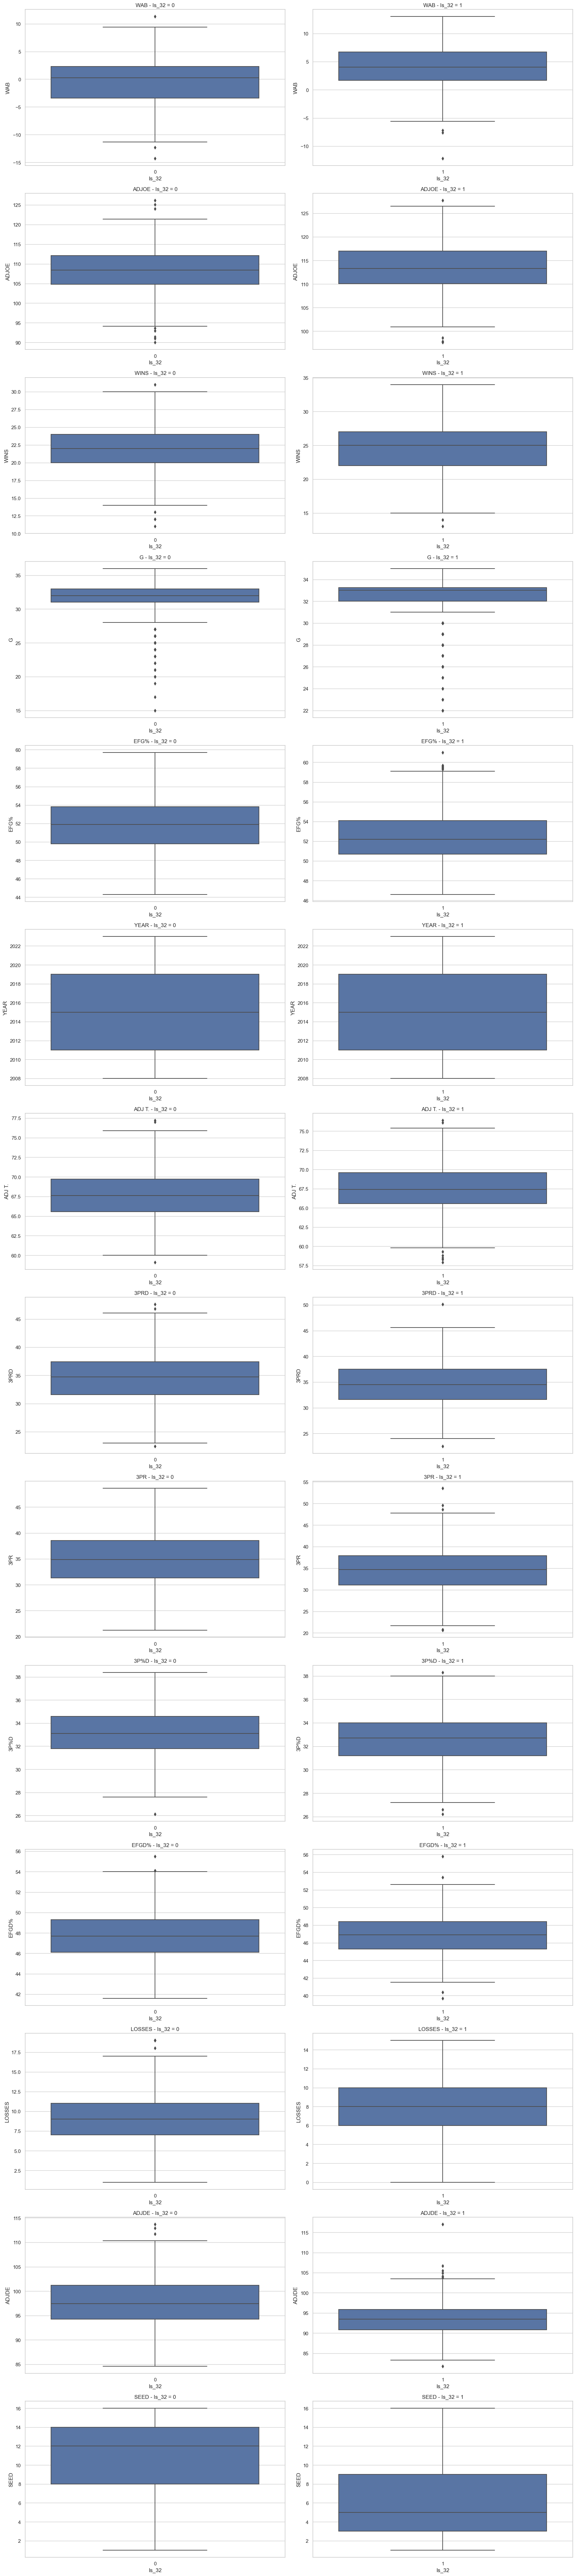

In [34]:
data['Is_32'] = data['Is_32'].astype(str)

# Create new DataFrames for Is_32 = 0 and Is_32 = 1
data_is_32_0 = data[data['Is_32'] == '0']
data_is_32_1 = data[data['Is_32'] == '1']

# List of variables for boxplots
variables = ['WAB', 'ADJOE', 'WINS', 'G', 'EFG%', 'YEAR', 'ADJ T.', '3PRD', '3PR', '3P%D', 'EFGD%', 'LOSSES', 'ADJDE', 'SEED']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=2, figsize=(18, 80))

for i, variable in enumerate(variables):
    sns.boxplot(x='Is_32', y=variable, data=data_is_32_0, ax=axes[i, 0]).set(title=f'{variable} - Is_32 = 0')

    sns.boxplot(x='Is_32', y=variable, data=data_is_32_1, ax=axes[i, 1]).set(title=f'{variable} - Is_32 = 1')
plt.tight_layout()
plt.show()

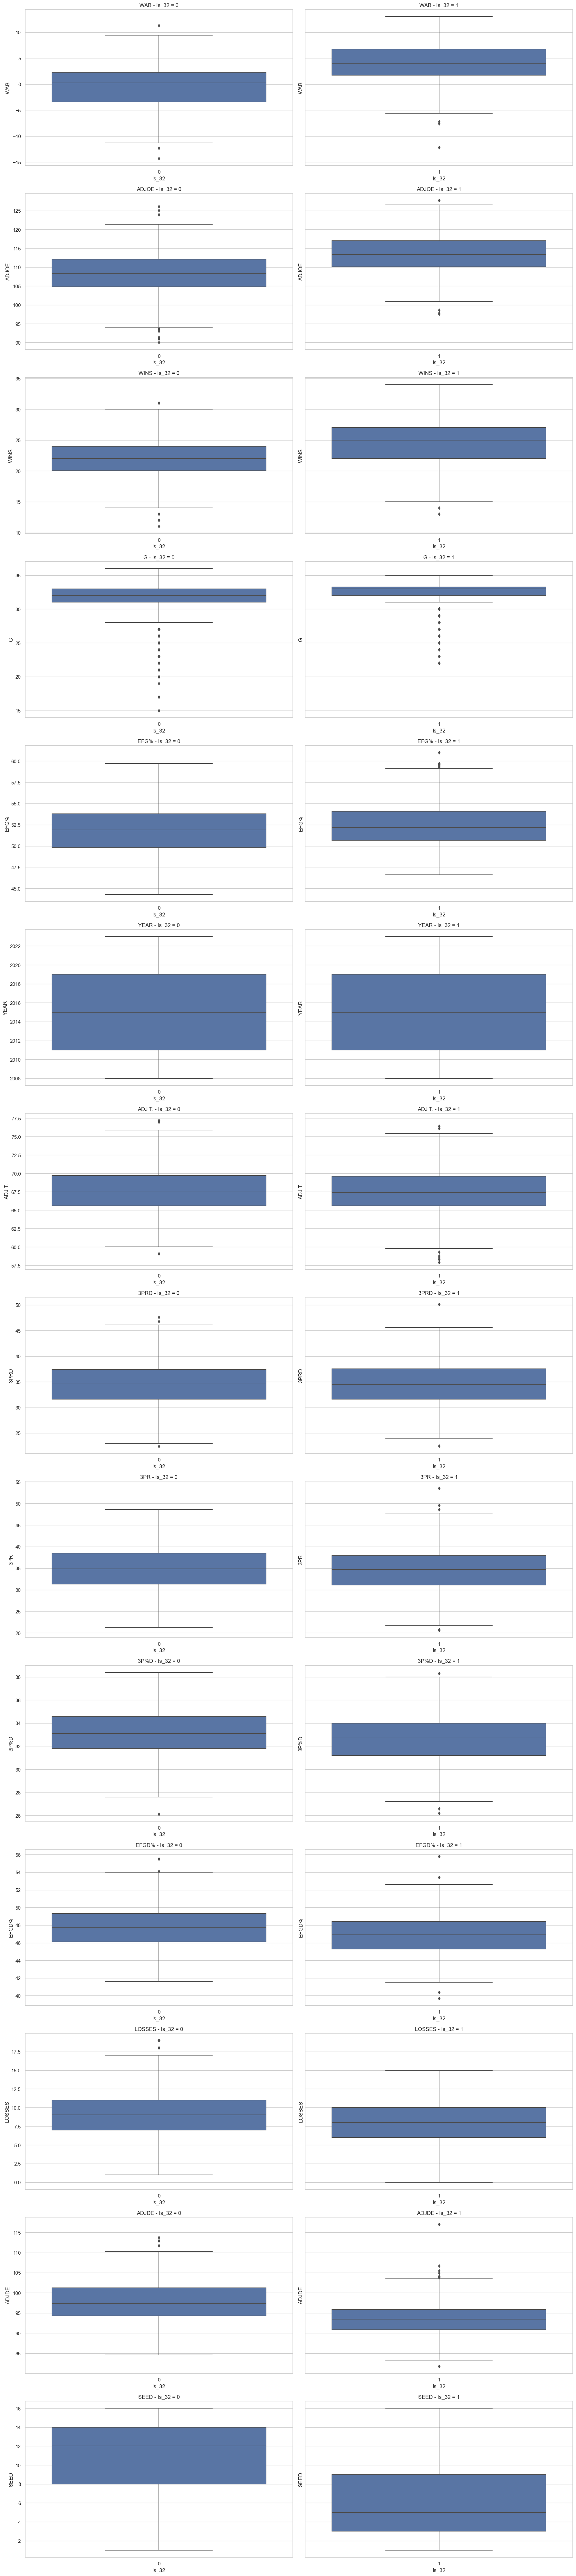

In [36]:

data['Is_32'] = data['Is_32'].astype(str)

data_is_32_0 = data[data['Is_32'] == '0']
data_is_32_1 = data[data['Is_32'] == '1']


variables = ['WAB', 'ADJOE', 'WINS', 'G', 'EFG%', 'YEAR', 'ADJ T.', '3PRD', '3PR', '3P%D', 'EFGD%', 'LOSSES', 'ADJDE', 'SEED']

sns.set(style="whitegrid")


fig, axes = plt.subplots(nrows=len(variables), ncols=2, figsize=(18, 80), sharey='row')

for i, variable in enumerate(variables):
    sns.boxplot(x='Is_32', y=variable, data=data_is_32_0, ax=axes[i, 0]).set(title=f'{variable} - Is_32 = 0')
    sns.boxplot(x='Is_32', y=variable, data=data_is_32_1, ax=axes[i, 1]).set(title=f'{variable} - Is_32 = 1')


plt.tight_layout()
plt.show()
